# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
#print(cities)

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
#use dataset to see location of each value
url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
apiKey=weather_api_key
#city="hithadhoo"
city_url = f"{url}appid={apiKey}&units={units}&q={city}"
city_weather = requests.get(city_url).json()
print(city_weather)


{'coord': {'lon': -112.4661, 'lat': 42.9208}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 34.61, 'feels_like': 25.79, 'temp_min': 31.87, 'temp_max': 39.15, 'pressure': 1011, 'humidity': 76}, 'visibility': 4828, 'wind': {'speed': 12.66, 'deg': 330}, 'clouds': {'all': 100}, 'dt': 1680476020, 'sys': {'type': 2, 'id': 2037475, 'country': 'US', 'sunrise': 1680441019, 'sunset': 1680486976}, 'timezone': -21600, 'id': 5588842, 'name': 'Chubbuck', 'cod': 200}


In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units="metric"
apiKey=weather_api_key



# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={apiKey}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        #city = city_weather['name']
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nianzishan
Processing Record 2 of Set 1 | artigas
Processing Record 3 of Set 1 | kaitangata
Processing Record 4 of Set 1 | cidreira
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | ostrovnoy
Processing Record 7 of Set 1 | turkistan
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | pisco
Processing Record 10 of Set 1 | kawambwa
Processing Record 11 of Set 1 | yanan
City not found. Skipping...
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | korla
Processing Record 14 of Set 1 | cherskiy
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | vila franca do campo
Processing Record 17 of Set 1 | vao
Processing Record 18 of Set 1 | cabo san lucas
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 21 of Set 1 | nabire
Processing Record 2

Processing Record 36 of Set 4 | nikolskoye
Processing Record 37 of Set 4 | socuellamos
Processing Record 38 of Set 4 | hilo
Processing Record 39 of Set 4 | clarksburg
Processing Record 40 of Set 4 | alvarado
Processing Record 41 of Set 4 | nishihara
Processing Record 42 of Set 4 | rojhan
Processing Record 43 of Set 4 | codrington
Processing Record 44 of Set 4 | manggar
Processing Record 45 of Set 4 | masunga
Processing Record 46 of Set 4 | upernavik
Processing Record 47 of Set 4 | westport
Processing Record 48 of Set 4 | moroni
Processing Record 49 of Set 4 | dalbandin
Processing Record 0 of Set 5 | amderma
City not found. Skipping...
Processing Record 1 of Set 5 | eureka
Processing Record 2 of Set 5 | alta floresta
Processing Record 3 of Set 5 | bredasdorp
Processing Record 4 of Set 5 | coihaique
Processing Record 5 of Set 5 | ribeira brava
Processing Record 6 of Set 5 | inhambane
Processing Record 7 of Set 5 | east london
Processing Record 8 of Set 5 | midland
Processing Record 9 of 

Processing Record 29 of Set 8 | agadir
Processing Record 30 of Set 8 | ust-tsilma
Processing Record 31 of Set 8 | qui nhon
Processing Record 32 of Set 8 | hami
Processing Record 33 of Set 8 | port-gentil
Processing Record 34 of Set 8 | salalah
Processing Record 35 of Set 8 | havelock
Processing Record 36 of Set 8 | wadi musa
Processing Record 37 of Set 8 | mweka
Processing Record 38 of Set 8 | bereda
Processing Record 39 of Set 8 | del rio
Processing Record 40 of Set 8 | norsup
Processing Record 41 of Set 8 | brest
Processing Record 42 of Set 8 | peterhead
Processing Record 43 of Set 8 | sobolevo
Processing Record 44 of Set 8 | meulaboh
Processing Record 45 of Set 8 | sanmenxia
Processing Record 46 of Set 8 | tazovskiy
Processing Record 47 of Set 8 | chaozhou
Processing Record 48 of Set 8 | klyuchi
Processing Record 49 of Set 8 | tolaga bay
Processing Record 0 of Set 9 | hirara
Processing Record 1 of Set 9 | nome
Processing Record 2 of Set 9 | sistranda
Processing Record 3 of Set 9 | d

Processing Record 23 of Set 12 | thessalon
Processing Record 24 of Set 12 | marcona
City not found. Skipping...
Processing Record 25 of Set 12 | mehamn
Processing Record 26 of Set 12 | vidim
Processing Record 27 of Set 12 | kulhudhuffushi
Processing Record 28 of Set 12 | abeokuta
Processing Record 29 of Set 12 | vallenar
Processing Record 30 of Set 12 | acarau
Processing Record 31 of Set 12 | stadtallendorf
Processing Record 32 of Set 12 | saltabarranca
Processing Record 33 of Set 12 | ghanzi
Processing Record 34 of Set 12 | hihifo
City not found. Skipping...
Processing Record 35 of Set 12 | staryy nadym
Processing Record 36 of Set 12 | erdenet
Processing Record 37 of Set 12 | ndele
Processing Record 38 of Set 12 | tikapur
Processing Record 39 of Set 12 | aykhal
Processing Record 40 of Set 12 | casa nova
Processing Record 41 of Set 12 | freeport
Processing Record 42 of Set 12 | xinzhi
Processing Record 43 of Set 12 | leshukonskoye
Processing Record 44 of Set 12 | tiarei
Processing Reco

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nianzishan,47.5167,122.8833,4.94,49,100,8.65,CN,1680476020
1,artigas,-30.4000,-56.4667,17.85,59,35,3.99,UY,1680476020
2,kaitangata,-46.2817,169.8464,15.52,68,49,2.45,NZ,1680476020
3,cidreira,-30.1811,-50.2056,20.48,65,9,3.46,BR,1680475836
4,atuona,-9.8000,-139.0333,27.26,76,40,6.46,PF,1680475828


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nianzishan,47.5167,122.8833,4.94,49,100,8.65,CN,1680476020
1,artigas,-30.4000,-56.4667,17.85,59,35,3.99,UY,1680476020
2,kaitangata,-46.2817,169.8464,15.52,68,49,2.45,NZ,1680476020
3,cidreira,-30.1811,-50.2056,20.48,65,9,3.46,BR,1680475836
4,atuona,-9.8000,-139.0333,27.26,76,40,6.46,PF,1680475828


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

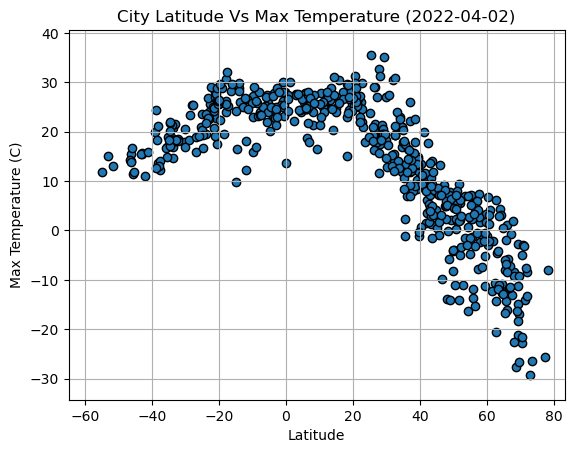

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude Vs Max Temperature (2022-04-02)')
plt.xlim(min(x_values)-10, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

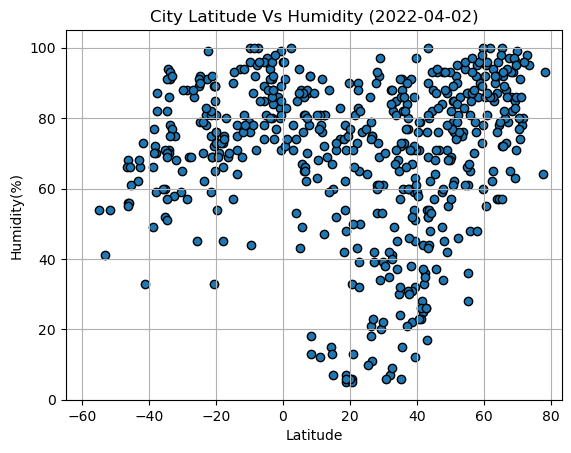

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude Vs Humidity (2022-04-02)')
plt.xlim(min(x_values)-10, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

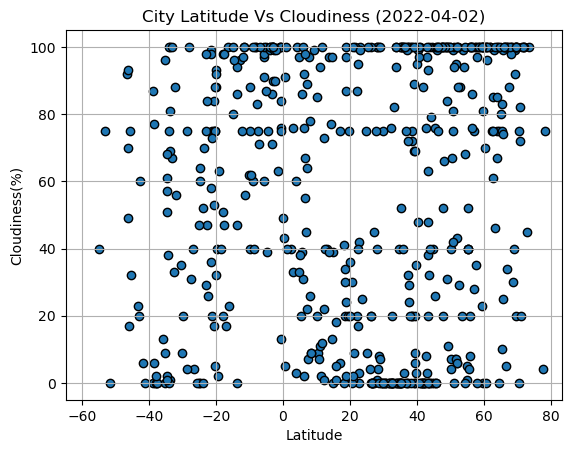

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude Vs Cloudiness (2022-04-02)')
plt.xlim(min(x_values)-10, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

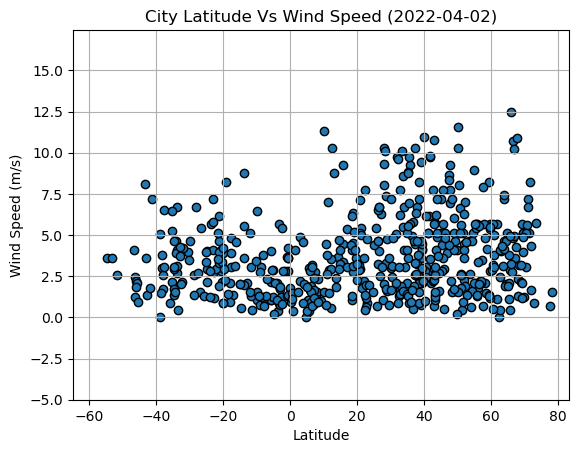

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude Vs Wind Speed (2022-04-02)')
plt.xlim(min(x_values)-10, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nianzishan,47.5167,122.8833,4.94,49,100,8.65,CN,1680476020
5,ostrovnoy,68.0531,39.5131,-8.48,86,100,2.31,RU,1680476021
6,turkistan,43.0000,68.0000,9.26,17,97,10.78,KZ,1680476021
7,barrow,71.2906,-156.7887,-13.99,78,100,5.14,US,1680476021
10,yellowknife,62.4560,-114.3525,-10.71,62,75,0.00,CA,1680475573


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,artigas,-30.4000,-56.4667,17.85,59,35,3.99,UY,1680476020
2,kaitangata,-46.2817,169.8464,15.52,68,49,2.45,NZ,1680476020
3,cidreira,-30.1811,-50.2056,20.48,65,9,3.46,BR,1680475836
4,atuona,-9.8000,-139.0333,27.26,76,40,6.46,PF,1680475828
8,pisco,-13.7000,-76.2167,26.03,78,0,8.75,PE,1680476021


###  Temperature vs. Latitude Linear Regression Plot

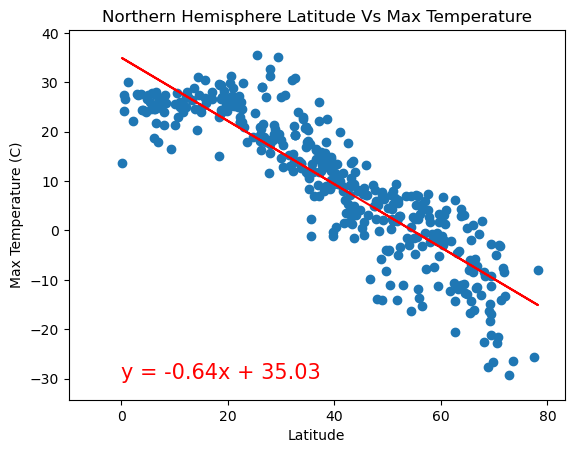

The r-value is: 0.7807883204763508.


In [16]:
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Northern Hemisphere Latitude Vs Max Temperature')
plt.xlim(min(x_values)-10, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)

#Run linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-30),fontsize=15,color="red")

# Show plot and display rvalue
plt.show()
print(f'The r-value is: {rvalue**2}.')

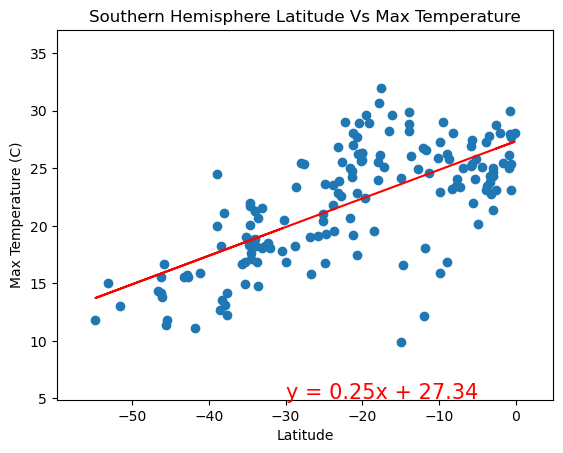

The r-value is: 0.46449154710364154.


In [17]:
# Linear regression on Southern Hemisphere
# Build scatter plot for latitude vs. temperature
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Southern Hemisphere Latitude Vs Max Temperature')
plt.xlim(min(x_values)-5, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)

#Run linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,5),fontsize=15,color="red")

# Show plot and display rvalue
plt.show()
print(f'The r-value is: {rvalue**2}.')

**Discussion about the linear relationship:** 
In the Northern Hemisphere there is a negative correlation between Latitude and Maximum temperature as Latitude increases the Temperature decreases. 
The Southern Hemisphere has a positive correlation between Latitude and Maximum temperature as Latitude increases the Temperature increases.

### Humidity vs. Latitude Linear Regression Plot

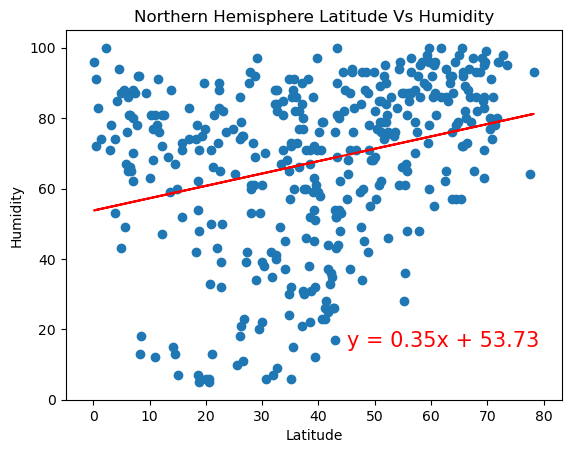

The r-value is: 0.07960766791623038.


In [18]:
# Northern Hemisphere

# Build scatter plot for latitude vs. temperature
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere Latitude Vs Humidity')
plt.xlim(min(x_values)-5, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)

#Run linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")

# Show plot and display rvalue
plt.show()
print(f'The r-value is: {rvalue**2}.')

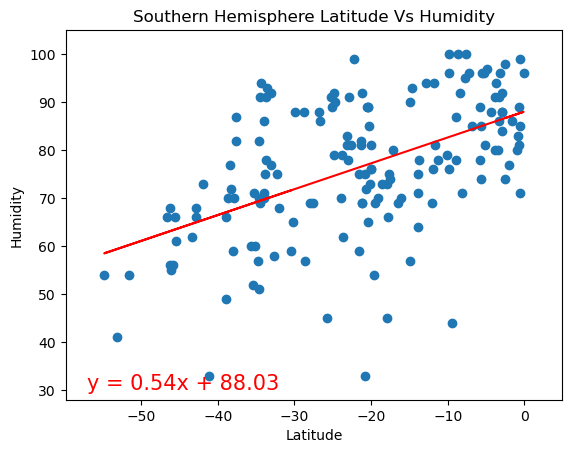

The r-value is: 0.2723964004753783.


In [19]:
# Southern Hemisphere
# Build scatter plot for latitude vs. temperature
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere Latitude Vs Humidity')
plt.xlim(min(x_values)-5, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)

#Run linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-57,30),fontsize=15,color="red")

# Show plot and display rvalue
plt.show()
print(f'The r-value is: {rvalue**2}.')

**Discussion about the linear relationship:** 
Both the Northern and Southern Hemisphere have a positive correlation between Latitude and Humidity. But for both hemispheres the relationship between Latitude and Humdity does not display a strong correlation between the two variables. But overall trend if Latitude increases Humidity increases. 

### Cloudiness vs. Latitude Linear Regression Plot

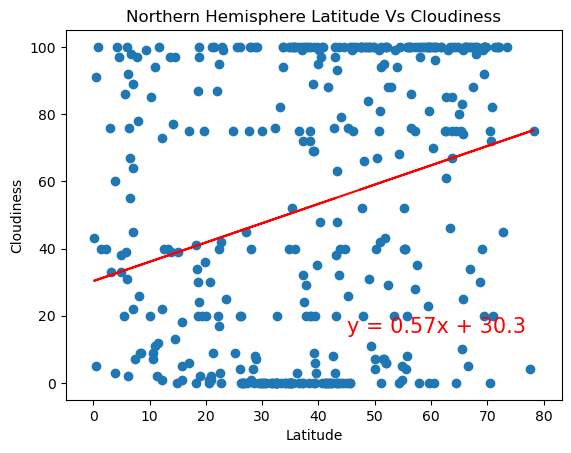

The r-value is: 0.07306548795270244.


In [20]:
# Northern Hemisphere
# Build scatter plot for latitude vs. temperature
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere Latitude Vs Cloudiness')
plt.xlim(min(x_values)-5, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)

#Run linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")

# Show plot and display rvalue
plt.show()
print(f'The r-value is: {rvalue**2}.')

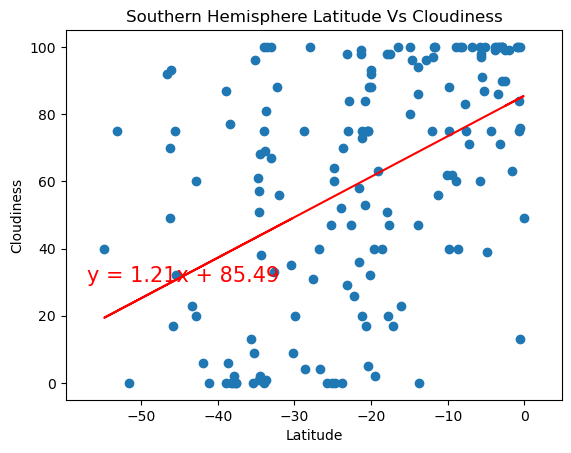

The r-value is: 0.2242838047433377.


In [21]:
# Southern Hemisphere
# Build scatter plot for latitude vs. temperature
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere Latitude Vs Cloudiness')
plt.xlim(min(x_values)-5, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)

#Run linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-57,30),fontsize=15,color="red")

# Show plot and display rvalue
plt.show()
print(f'The r-value is: {rvalue**2}.')


**Discussion about the linear relationship:** 
Both the Northern and Southern Hemisphere have a positive correlation between Latitude and Cloudiness. But for both hemispheres the relationship between Latitude and Cloudiness does not display a strong correlation between the two variables. But overall trend if Latitude increases Cloudiness increases.

### Wind Speed vs. Latitude Linear Regression Plot

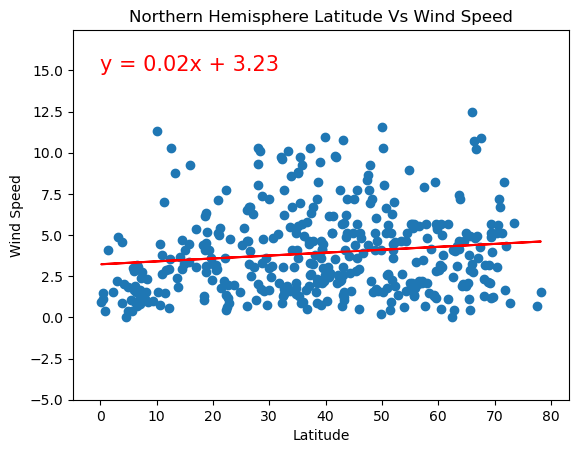

The r-value is: 0.01713656286010456.


In [22]:
# Northern Hemisphere
# Build scatter plot for latitude vs. temperature
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere Latitude Vs Wind Speed')
plt.xlim(min(x_values)-5, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)

#Run linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,15),fontsize=15,color="red")

# Show plot and display rvalue
plt.show()
print(f'The r-value is: {rvalue**2}.')

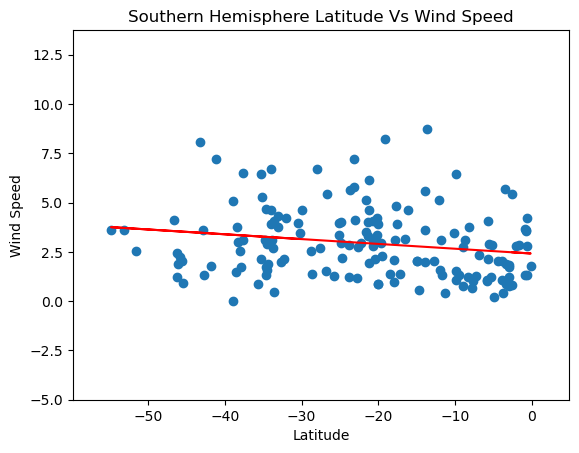

The r-value is: 0.036652041630060125.


In [23]:
# Southern Hemisphere
# Build scatter plot for latitude vs. temperature
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere Latitude Vs Wind Speed')
plt.xlim(min(x_values)-5, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)

#Run linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")

# Show plot and display rvalue
plt.show()
print(f'The r-value is: {rvalue**2}.')

**Discussion about the linear relationship:** 
In the Northern Hemisphere there is a slightly positive correlation between Latitude and Wind Speed as Latitude increases the Wind Speed increases. But the corrleations between the two variables is not strong and looks like wind speed stay within the same range for the most part. 
The Southern Hemisphere has a slightly negative correlation between Latitude and Wind Speed as Latitude increases the Wind Speed decreases.But the corrleations between the two variables is not strong and looks like wind speed stay within the same range for the most part.